## POD Post-process

Scripts to visualize and post-process the POD results. 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import matplotlib.pylab as pylab
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (15, 5),
         'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#
from pymech import dataset
import pickle
#local modules
sys.path.append('./modules/')
from nek_snaps import dbCreator,dbReader,massMatrixReader
from plotters import contour2d,scatter

Path to the folder containing the POD data

In [5]:
path_ = "/home/t28465sr/Downloads/tempNek/mixlay/DATA1/"

Use below if the POD data are saved in `pickle` format. 

In [6]:
#info = {'pickleFile':path_+'pod_mixlay_1to2520'} 
#dbPOD = dbReader(info)

Use below if the POD data are saved as `numpy` arrays. 

In [7]:
pod_ = np.load(path_+'pod_mixlay_1to3982_velPickle_3000.npz')

POD data

In [8]:
lam = pod_['eigs']   #eigenvalues
a = pod_['tCoeffs']  #temporal coefficients
phi = pod_['modes']  #spatial modes

In [6]:
#print(lam)

## Eigenvalues

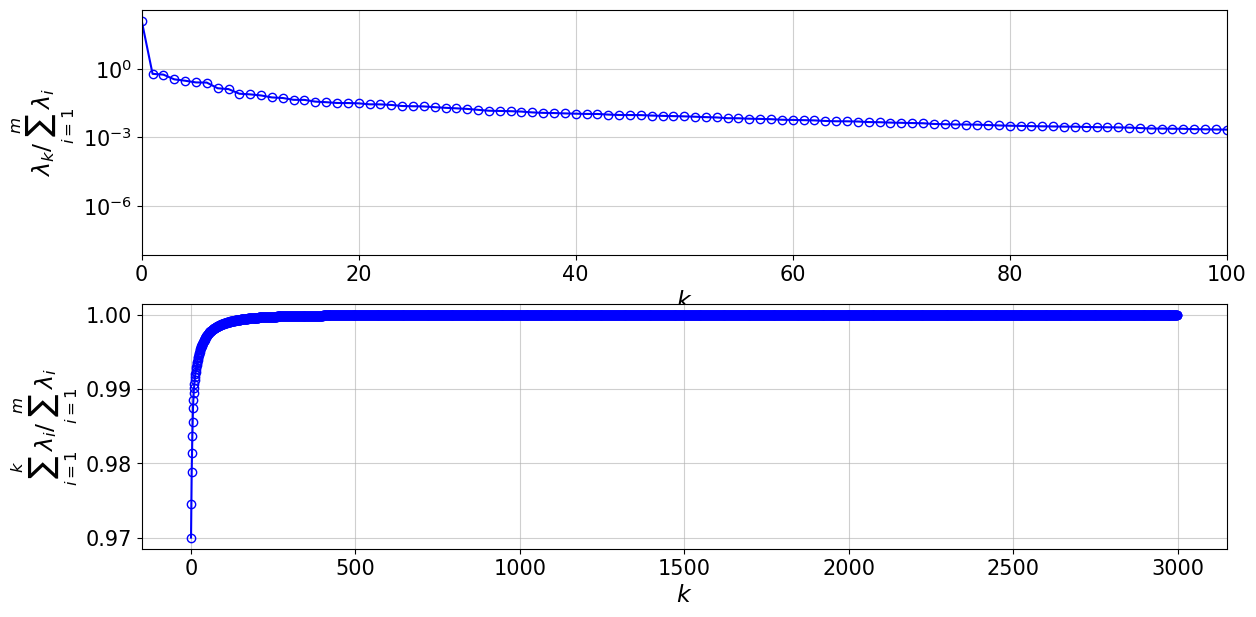

In [29]:
#print('Eigenvalues:',Lam2)
plt.figure(figsize=(14,7))
plt.subplot(211)
#plt.semilogy(lam/sum(lam),'-ob')
plt.semilogy(lam,'-ob')
plt.xlabel(r'$k$')
plt.ylabel(r'$\lambda_k/\sum_{i=1}^m{\lambda_i}$')
plt.xlim([0,100])
plt.grid()

plt.subplot(212)
plt.plot(np.cumsum(lam)/sum(lam),'o-b')

plt.xlabel(r'$k$')
plt.ylabel(r'$\sum_{i=1}^k\lambda_i/\sum_{i=1}^m{\lambda_i}$')
plt.grid()
plt.show()

## Temporal coefficients 

Shape of the eigenvectors array: (3000, 3000)
||A_1||=43.0453
||A_2||=41.365
||A_1.A_2||=-1.03961e-12


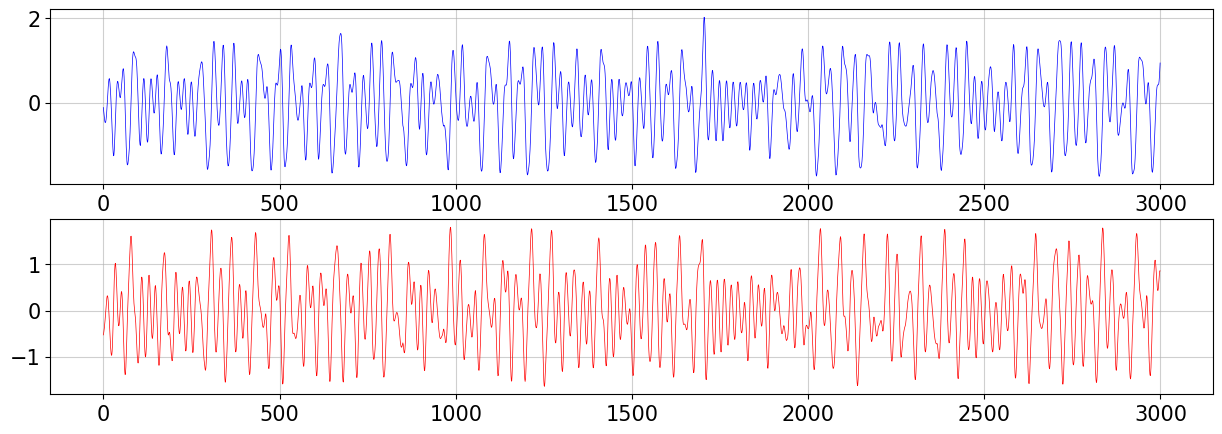

In [20]:
print('Shape of the eigenvectors array:',a.shape)

#modes number
iMod1 = 1
iMod2 = 2

print('||A_%d||=%g' %(iMod1,la.norm(a[:,iMod1]))) 
print('||A_%d||=%g' %(iMod2,la.norm(a[:,iMod2]))) 
print('||A_%d.A_%d||=%g' %(iMod1,iMod2,np.dot(a[:,iMod1],a[:,iMod2]))) 

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(a[:,iMod1],'-b',lw=0.5)
plt.grid(0.5)

plt.subplot(212)
plt.plot(a[:,iMod2],'-r',lw=0.5)
plt.grid(0.5)
plt.show()

## Spatial Modes

In [21]:
x = pod_['x']
y = pod_['y']
nxy = x.shape[0]*x.shape[1]

Plot the POD mode `iMod` associated with $u_x$ and $u_y$

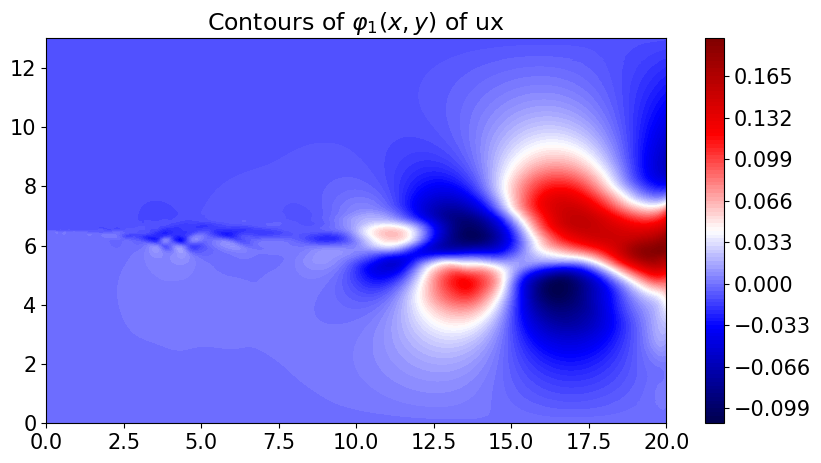

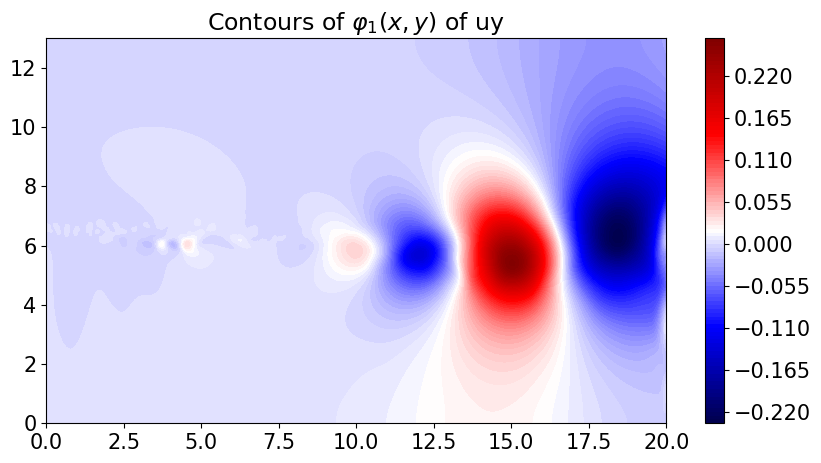

In [28]:
iMod = 1

contour2d(phi[:nxy,iMod],x,y,title=r'Contours of ${\varphi}_{%d} (x,y)$ of ux' %(iMod))
contour2d(phi[nxy:,iMod],x,y,title=r'Contours of ${\varphi}_{%d} (x,y)$ of uy' %(iMod))    